# Logistic Regression

## Linear Regression transformed with Logistic Function Sigmoid

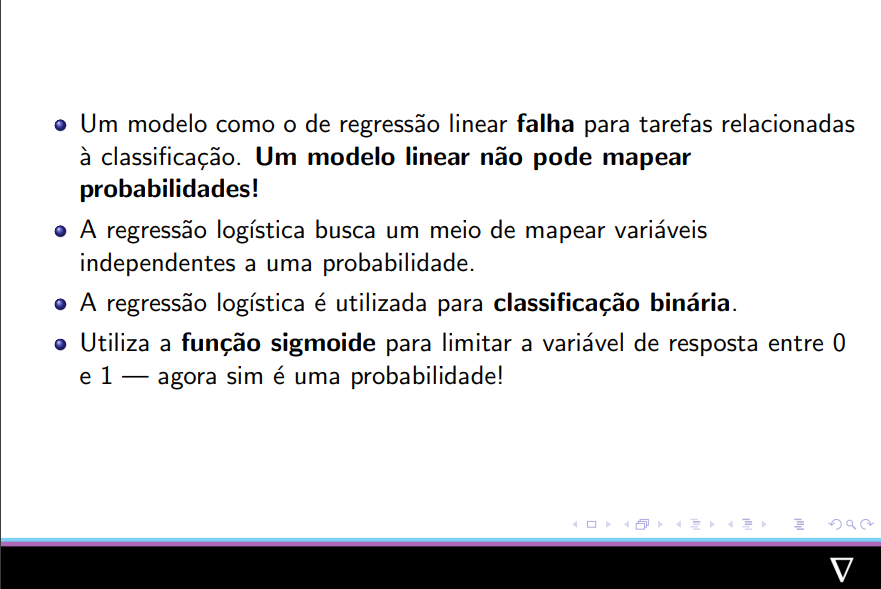

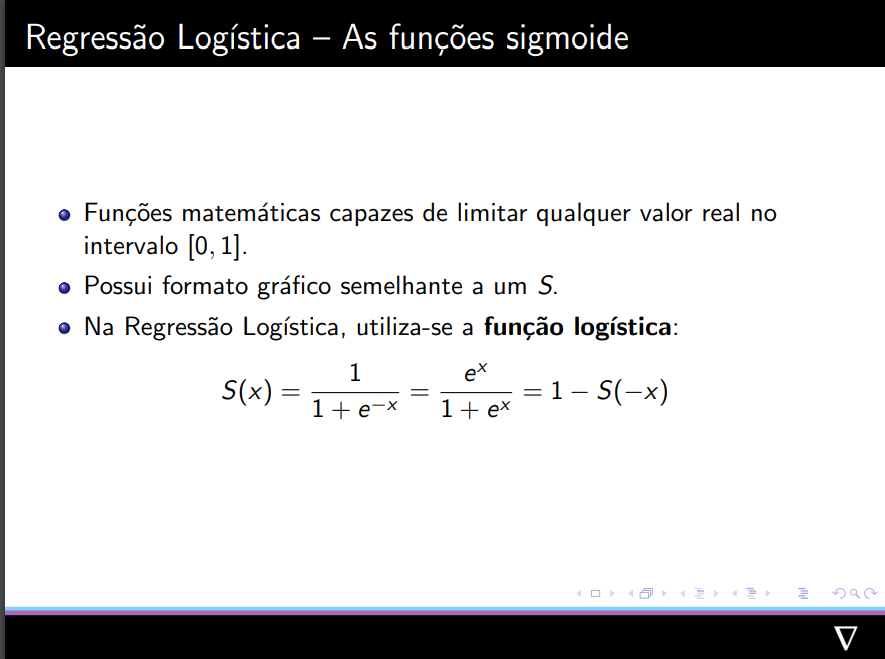

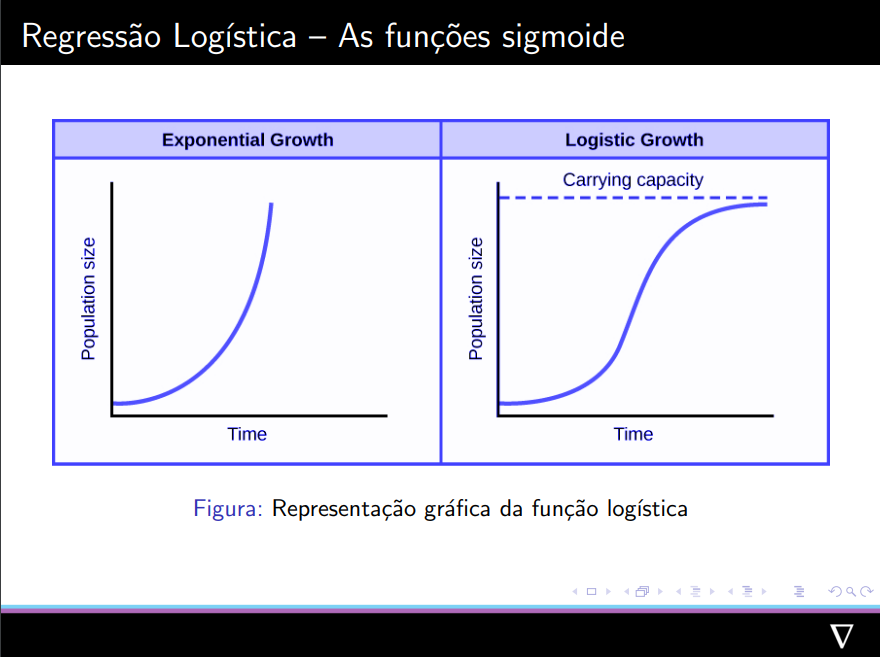

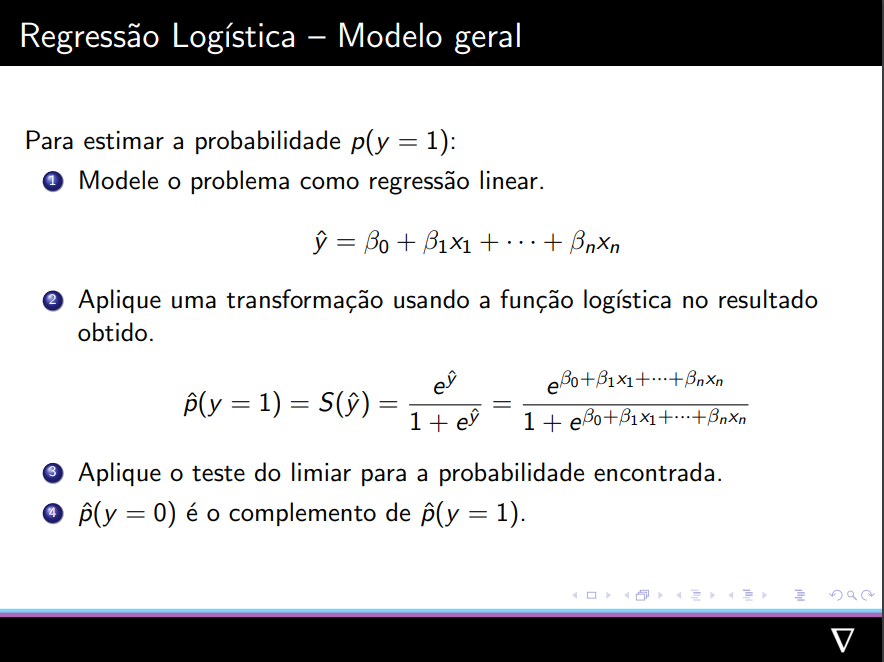

### Artificial Dataset

In [11]:
%pip install mlxtend --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

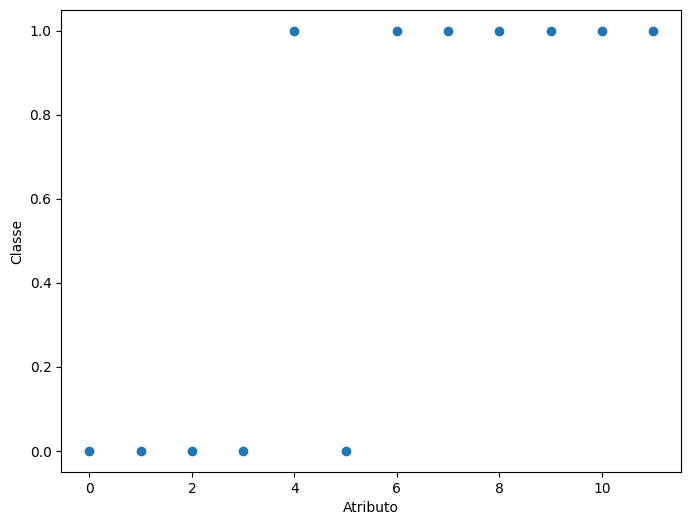

In [3]:
X = np.arange(12).reshape(-1, 1)
y = np.array([0, 0, 0, 0,1,0, 1, 1, 1, 1, 1, 1])

plt.figure(figsize=(8,6))
plt.scatter(X,y)
plt.xlabel('Atributo')
plt.ylabel('Classe')
plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X,y)

model.predict(X)

array([[5.40222464e-01, 4.59777536e-01],
       [7.39431412e-03, 9.92605686e-01],
       [9.66483853e-01, 3.35161468e-02],
       [9.99258825e-01, 7.41174556e-04],
       [4.24353699e-03, 9.95756463e-01],
       [9.72684978e-01, 2.73150219e-02],
       [2.52535205e-01, 7.47464795e-01],
       [2.42317937e-01, 7.57682063e-01],
       [9.41471390e-01, 5.85286100e-02],
       [8.37879425e-02, 9.16212057e-01],
       [2.69179177e-04, 9.99730821e-01],
       [5.34048930e-01, 4.65951070e-01],
       [9.39031219e-01, 6.09687808e-02],
       [7.68162441e-02, 9.23183756e-01],
       [3.35081805e-03, 9.96649182e-01],
       [9.59707478e-01, 4.02925215e-02],
       [1.37466580e-02, 9.86253342e-01],
       [8.82213517e-01, 1.17786483e-01],
       [5.23209378e-03, 9.94767906e-01],
       [9.99017630e-01, 9.82370185e-04],
       [2.73560041e-02, 9.72643996e-01],
       [5.82895075e-01, 4.17104925e-01],
       [9.61368702e-01, 3.86312980e-02],
       [9.99651088e-01, 3.48912188e-04],
       [2.626367

In [5]:
from math import exp #função para e^(x)

z = lambda x : model.coef_[0] * x + model.intercept_
sigma = lambda x: 1/(1+exp(-z(x)))

/tmp/ipykernel_609/2524278769.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_sigmoid = np.arange(min(X), max(X), 0.5).reshape(-1,1)
/tmp/ipykernel_609/3150767706.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sigma = lambda x: 1/(1+exp(-z(x)))


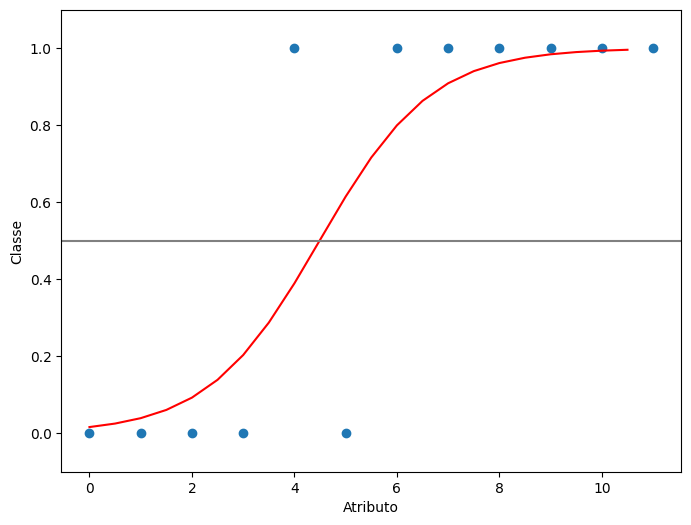

In [6]:
X_sigmoid = np.arange(min(X), max(X), 0.5).reshape(-1,1)
y_sigmoid = np.array(list(map(sigma, X_sigmoid)))

plt.figure(figsize=(8,6))
plt.scatter(X,y)
plt.xlabel('Atributo')
plt.ylabel('Classe')
plt.plot(X_sigmoid, y_sigmoid, color='red')
plt.axhline(.5, color='.5')
plt.ylim(-.1, 1.1)
plt.show()

In [7]:
wrongs = np.argwhere((model.predict(X) == y) == False)
wrongs

array([[4],
       [5]])

In [8]:
print('--'*20)
print('Utilizando a função sigmoid implementada:')
print('Probabilidades da classe 1')
print(np.array(list(map(sigma, X))))
print()
print('Probabilidades da classe 2')
print(1-np.array(list(map(sigma, X))))
print()
print('--'*20)
print('Utilizando o método predict_proba()')
print(model.predict_proba(X))

----------------------------------------
Utilizando a função sigmoid implementada:
Probabilidades da classe 1
[0.01600666 0.0391087  0.09242169 0.20305318 0.38930801 0.61464414
 0.79962855 0.90896583 0.96151238 0.98425355 0.99364645 0.99745091]

Probabilidades da classe 2
[0.98399334 0.9608913  0.90757831 0.79694682 0.61069199 0.38535586
 0.20037145 0.09103417 0.03848762 0.01574645 0.00635355 0.00254909]

----------------------------------------
Utilizando o método predict_proba()
[[0.98399334 0.01600666]
 [0.9608913  0.0391087 ]
 [0.90757831 0.09242169]
 [0.79694682 0.20305318]
 [0.61069199 0.38930801]
 [0.38535586 0.61464414]
 [0.20037145 0.79962855]
 [0.09103417 0.90896583]
 [0.03848762 0.96151238]
 [0.01574645 0.98425355]
 [0.00635355 0.99364645]
 [0.00254909 0.99745091]]


/tmp/ipykernel_609/3150767706.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sigma = lambda x: 1/(1+exp(-z(x)))


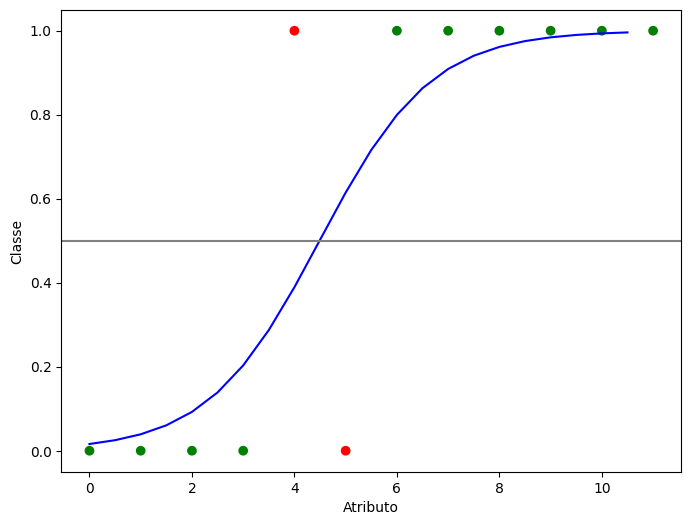

In [9]:
colors = ['green', 'red']
points_colors = [colors[idx in wrongs] for idx in range(len(X))]

plt.figure(figsize=(8,6))
plt.scatter(X,y, color=points_colors)
plt.xlabel('Atributo')
plt.ylabel('Classe')
plt.plot(X_sigmoid, y_sigmoid, color='blue')
plt.axhline(.5, color='.5')
plt.show()

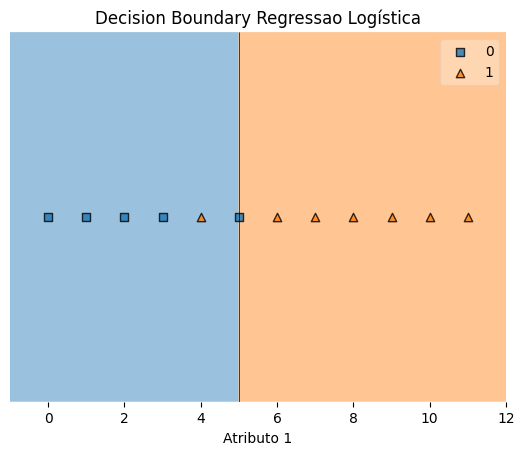

In [12]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X,y,clf=model)
plt.xlabel('Atributo 1')
plt.title('Decision Boundary Regressao Logística')
plt.show()

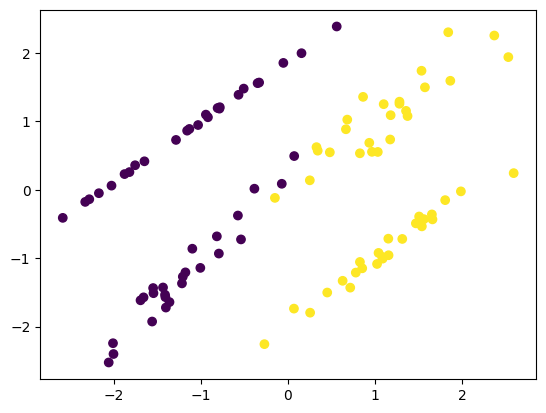

In [13]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=100, n_features=2, n_informative = 2, n_redundant=0,
    n_repeated=0, n_classes=2, random_state=42
)

plt.scatter(X[:, 0], X[:, 1], c=y)